<a href="https://colab.research.google.com/github/RushiK134/LetsGrowMore_Internship_projects/blob/main/Prediction_using_Decision_Tree_Algorithm_p4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LetsGrowMore Virtual Internship Program ( Feb2023 )**

**Auther : Rushikesh Katole**

**Task 4 : Prediction using Decision Tree Algorithm**

**Leven : Intermediate**

In these task, we haave to preform claddification on the given database using Decision Tree Algorithm. Here, we use entropy to make Decision Tree to perform classification on the dataset and also make prediction using the Decision Tree.

# **Prediction using Decision Tree Algorithm**

### **Importing the Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **Loading the Dataset**

In [ ]:
columnss = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species']
data = pd.read_csv('/content/IRIS.csv',names=columnss)

In [ ]:
# Looking first 5 rows of the dataset
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Looking last 5 rows of the dataset
data.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


### **Getting the size of the dataset**

In [ ]:
print("Number of rows in the dataset :", data.shape[0]) 
print("Number of columns in the dataset :", data.shape[1])

Number of rows in the dataset : 150
Number of columns in the dataset : 5


In [ ]:
columns = data.columns.tolist()
print("List of Columns :", columns)

List of Columns : ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']


### **Extraction Useful Information**

In [ ]:
data = data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species']]
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### **Checking for Null Values**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

**there are no null values present in the dataset, So no need of handling the null valaues.**

### **Describing the Statistical Measures**

In [ ]:
data.describe(include = 'all')

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


## **Vidualizing the Data**

### **Checking for Count of Species in the Dataset**

In [ ]:
species_count = data['Species'].value_counts()
lables = species_count.index.tolist()
count = species_count.values.tolist()
species_count.to_frame()

,Species
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [ ]:
# plt.pie(count, labels = labels, labeldistance = 1.15, wedgeprops = {'linewidth' : 5, 'edgecolor' : 'white'}, textprops = {'fontsize' : 10})
# plt.title("Number of Species with its share in the Data", fontsixe = 16)
# plt.show()

### **Pair Plot for the Dataset**

In these plot, we plotted a relation of each pait of the features in the Dataset.

<Figure size 1080x432 with 0 Axes>

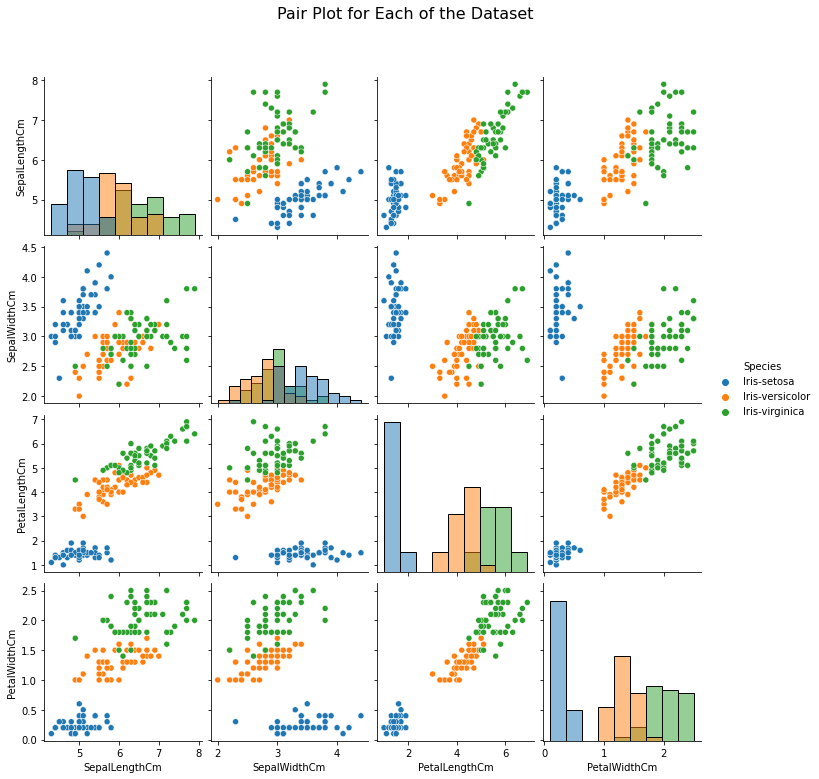

In [ ]:
fig = plt.figure(figsize = (15,6))
visual = sns.pairplot( data, hue = 'Species', diag_kind = 'hist')
visual.fig.suptitle("Pair Plot for Each of the Dataset", y = 1.08, fontsize = 16)
plt.show()

### **Correlation Heatmap between Features**

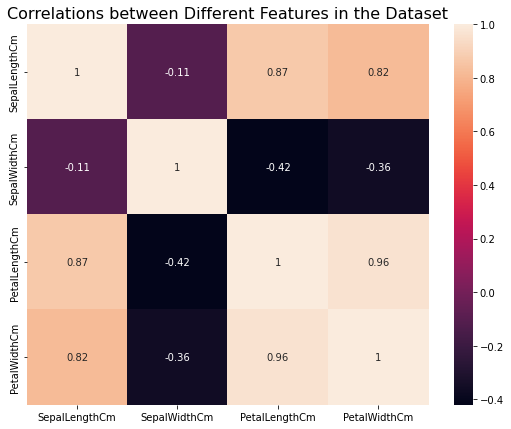

In [ ]:
plt.figure(figsize=(9,7))
sns.heatmap(data.corr(),annot=True)
plt.title('Correlations between Different Features in the Dataset', fontsize = 16)
plt.show()


### **Data Preptation**

In [ ]:
# X = data.iloc[:, 0:4]
# X = X.values
# X[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [ ]:
# Y = (data.iloc[:, 4])
# Y = Y.values
# Y[0:5]

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

In [ ]:
# seperate features and target.
data = df.values

X = data[:,0:4]
Y = data[:,4]
print(X)

[[4.9 3.0 1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.0 3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.0 3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.0 1.4 0.1]
 [4.3 3.0 1.1 0.1]
 [5.8 4.0 1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.0 0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.0 3.0 1.6 0.2]
 [5.0 3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.0 3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.0 1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.0 3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.0 3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.0 1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.0 3.3 1.4 0.2]
 [7.0 3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.9 1.5]
 [5.5 2.3 4.

In [ ]:
# Splitting the data into traning and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
print(X_train)

[[5.6 2.5 3.9 1.1]
 [6.0 3.0 4.8 1.8]
 [5.7 2.5 5.0 2.0]
 [7.0 3.2 4.7 1.4]
 [6.5 3.0 5.5 1.8]
 [5.0 3.4 1.6 0.4]
 [6.3 3.3 6.0 2.5]
 [6.7 2.5 5.8 1.8]
 [4.4 3.0 1.3 0.2]
 [6.9 3.1 5.4 2.1]
 [5.5 2.5 4.0 1.3]
 [5.0 3.3 1.4 0.2]
 [4.6 3.4 1.4 0.3]
 [5.1 3.8 1.5 0.3]
 [6.1 3.0 4.9 1.8]
 [5.0 3.5 1.6 0.6]
 [6.3 3.3 4.7 1.6]
 [7.7 2.8 6.7 2.0]
 [5.7 2.8 4.1 1.3]
 [5.4 3.9 1.7 0.4]
 [5.9 3.2 4.8 1.8]
 [7.2 3.2 6.0 1.8]
 [6.7 3.1 4.7 1.5]
 [7.2 3.0 5.8 1.6]
 [4.6 3.6 1.0 0.2]
 [4.9 3.0 1.4 0.2]
 [6.6 3.0 4.4 1.4]
 [5.6 2.9 3.6 1.3]
 [5.7 3.8 1.7 0.3]
 [7.2 3.6 6.1 2.5]
 [5.2 4.1 1.5 0.1]
 [5.7 2.8 4.5 1.3]
 [5.6 2.7 4.2 1.3]
 [5.5 2.4 3.8 1.1]
 [6.9 3.1 5.1 2.3]
 [5.5 2.6 4.4 1.2]
 [4.4 3.2 1.3 0.2]
 [5.1 3.5 1.4 0.3]
 [5.5 2.4 3.7 1.0]
 [6.5 3.0 5.2 2.0]
 [5.6 2.8 4.9 2.0]
 [6.0 2.7 5.1 1.6]
 [4.5 2.3 1.3 0.3]
 [6.9 3.2 5.7 2.3]
 [5.0 3.4 1.5 0.2]
 [5.7 2.6 3.5 1.0]
 [6.1 2.8 4.0 1.3]
 [6.7 3.1 4.4 1.4]
 [5.6 3.0 4.5 1.5]
 [6.3 2.3 4.4 1.3]
 [5.1 3.7 1.5 0.4]
 [5.5 4.2 1.4 0.2]
 [5.0 3.0 1.

### **Normalizing the Data **

In [ ]:
# from sklearn.model_selection import train_test_split

In [ ]:
# x_train, y_train, x_test, y_test = train_test_split(X,Y, test_size = 0.3, random_state = 1)
# print("Size of Traning Set ")
# print("X ->", x_train.shape)
# print("Y ->", y_train.shape)
# print()
# print("Size of Test Set ")
# print("X ->", x_test.shape)
# print("Y ->", y_test.shape)
# print()

Size of Traning Set 
X -> (105, 4)
Y -> (45, 4)

Size of Test Set 
X -> (105,)
Y -> (45,)



### **Model Development**

In [ ]:
from sklearn.tree import DecisionTreeClassifier


In [ ]:
IT = DecisionTreeClassifier(criterion = "entropy", max_depth = 4)
IT.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

### **Prediction Using the Created Modeel**

In [ ]:
y_pred = IT.predict(X_test)
y_pred

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor'], dtype=object)

### **Model Evaluation**

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix


In [ ]:
acc_score = accuracy_score(y_test, y_pred)
print("The accutacy of the Decision Tree Algorithm is :  ", str(acc_score*100)+ "%")

The accutacy of the Decision Tree Algorithm is :   96.66666666666667%


### **Evaluation using Confusion Matrix**

In [ ]:
# iris_cm = confusion_matrix(y_test, y_pred)
# species = data['Species'].unique().tolist()
# iris_cm = pd.DataFrame(iris_cm, index = species, columns = speciess)
# iris_cm

### **Visualizing the Decision Tree**

In [ ]:
from sklearn.tree import plot_tree

In [ ]:
# columns = data.columns.tolist()
columns = data.tolist()
print(columns)

[[4.9, 3.0, 1.4, 0.2, 'Iris-setosa'], [4.7, 3.2, 1.3, 0.2, 'Iris-setosa'], [4.6, 3.1, 1.5, 0.2, 'Iris-setosa'], [5.0, 3.6, 1.4, 0.2, 'Iris-setosa'], [5.4, 3.9, 1.7, 0.4, 'Iris-setosa'], [4.6, 3.4, 1.4, 0.3, 'Iris-setosa'], [5.0, 3.4, 1.5, 0.2, 'Iris-setosa'], [4.4, 2.9, 1.4, 0.2, 'Iris-setosa'], [4.9, 3.1, 1.5, 0.1, 'Iris-setosa'], [5.4, 3.7, 1.5, 0.2, 'Iris-setosa'], [4.8, 3.4, 1.6, 0.2, 'Iris-setosa'], [4.8, 3.0, 1.4, 0.1, 'Iris-setosa'], [4.3, 3.0, 1.1, 0.1, 'Iris-setosa'], [5.8, 4.0, 1.2, 0.2, 'Iris-setosa'], [5.7, 4.4, 1.5, 0.4, 'Iris-setosa'], [5.4, 3.9, 1.3, 0.4, 'Iris-setosa'], [5.1, 3.5, 1.4, 0.3, 'Iris-setosa'], [5.7, 3.8, 1.7, 0.3, 'Iris-setosa'], [5.1, 3.8, 1.5, 0.3, 'Iris-setosa'], [5.4, 3.4, 1.7, 0.2, 'Iris-setosa'], [5.1, 3.7, 1.5, 0.4, 'Iris-setosa'], [4.6, 3.6, 1.0, 0.2, 'Iris-setosa'], [5.1, 3.3, 1.7, 0.5, 'Iris-setosa'], [4.8, 3.4, 1.9, 0.2, 'Iris-setosa'], [5.0, 3.0, 1.6, 0.2, 'Iris-setosa'], [5.0, 3.4, 1.6, 0.4, 'Iris-setosa'], [5.2, 3.5, 1.5, 0.2, 'Iris-setosa'], 

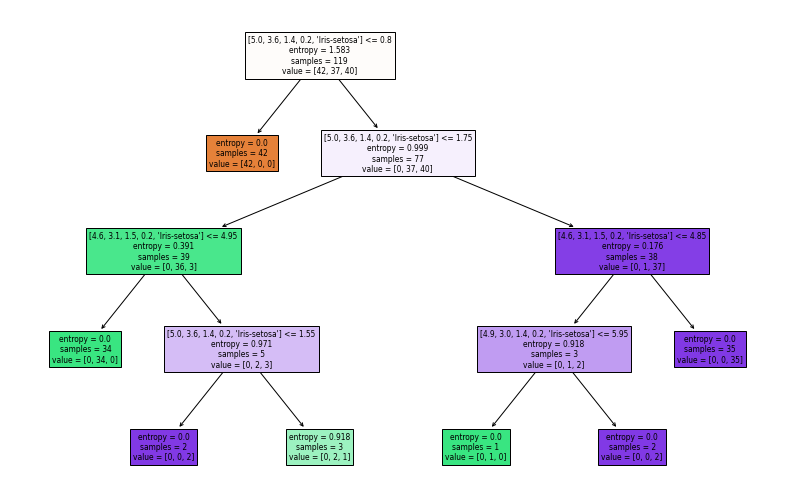

In [ ]:
fig = plt.figure(figsize=(14,9))
tree_visual = plot_tree(IT, feature_names= columns, filled = True)
